# John Schiff - Homework 04

## Due Tuesday, March 1st

For all of the plots, make sure that you use labels with units as appropriate, and make good choices about all of the plot characteristics like fontsize, colors, and markersize. Choose colormaps that are appropriate for your data; that is, sequential for sequential data or diverging for diverging data. Don't use the default jet (rainbow) colormap!

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date
import scipy.stats as stats
import matplotlib.animation as animation
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FuncFormatter

### 1. Basic Line Plotting

Reproduce this image, showing river flow during flood years of the Merrimack River

![Merrimack River Discharge](merrimack_discharge.png)

The data used to create this plot can be found [un t](../data/merrimack_discharge.dat). You may read in the data any way you want. That is, you may extract the data for the years in question by hand, however part of your grade will be based on creating a flexible script that could read in values from another datafile, e.g., from another river gauge. Pay attention to detail.

   - *Undergraduates*: Focus only on the four lines representing river flow in the four specific years (1936, 1938, 1960, 1987).
   - *Graduates*: Do the undergrad work, and then add the black line representing the mean discharge (calculated from the data in the file), and the shaded region representing one standard deviation from the mean.

In [24]:
def convert_date(string):
    x = string.decode("utf-8") # str and bytes are not equivalent in Python 3 (unlike Python 2)
    return datetime.strptime(x, '%Y-%m-%d') # string = date from the column in string format

data00 = np.genfromtxt('merrimack_discharge.dat',\
                    skip_header=25,usecols=(2,3),\
                  converters={'Date':convert_date},\
                  names=('Date', 'dis'),\
                  dtype=None)

In [25]:
dis1936 = []
dis1938 = []
dis1960 = []
dis1987 = []
mean = []
# month1936 = [] Don't need
# month1938 = []
# month1960 = []
# month1987 = []

for element in range(len(data00['Date'])):
    if data00['Date'][element].year == 1936:
        dis1936.append(data00['dis'][element]*0.0283168) # Convert from cubic feet to cubic meters
#         month1936.append(data00['Date'][element].month)
    elif data00['Date'][element].year == 1938:
        dis1938.append(data00['dis'][element]*0.0283168)
#         month1938.append(data00['Date'][element].month)
    elif data00['Date'][element].year == 1960:
        dis1960.append(data00['dis'][element]*0.0283168)
#         month1960.append(data00['Date'][element].month)
    elif data00['Date'][element].year == 1987:
        dis1987.append(data00['dis'][element]*0.0283168)
#         month1987.append(data00['Date'][element].month)
#     elif data00['Date'][element].year
       
    else:
        continue

In [30]:
# Cannot figure out how to get mean by combining lists into array and doing np.mean along axis (uneven arrays),
#                                                                                     doing this instead

In [61]:
f = open('merrimack_discharge.dat')
f.seek(0)
line=f.readlines()

dict00={}
for i in range(1923,2005):
    Year=str(i)
    dict00[Year]=[]
    for l in line:
        data= l.split('\t')
        if not data: continue
        if len(data)<3: continue
        elif data[2].split('-')[0]==str(i):
            dict00[Year].append(float(data[3])*0.0283168) # Multiply by factor to convert cubic feet to cubic meters   
            
# Script for the mean-- create a list and append the calculated mean into it
            
mean = []
for day in range(0,365):
    a=0 # Total number for a = 365
    arr=[]
    for i in range(1924,2004):
        a+=dict00[str(i)][day]
        arr.append(dict00[str(i)][day])
    mean.append(a/len(range(1924,2004))) # len(range(1924,2004)) = 80, so each a (365 in total) divided by 80

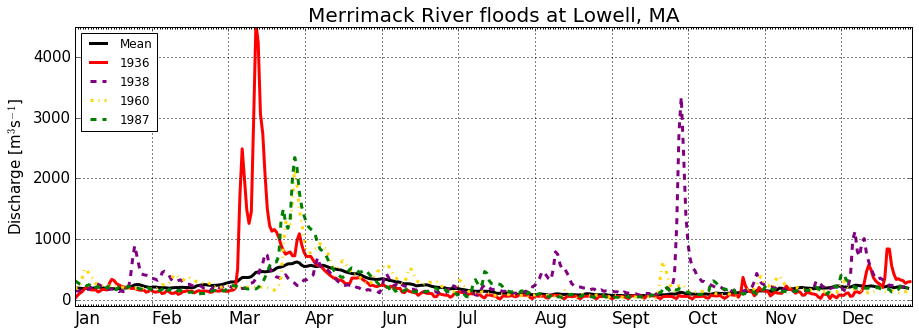

In [89]:
fig00 = plt.figure(figsize=(15,5))
ax00 = fig00.add_subplot(1,1,1)
ax00.plot(mean,lw=3, color='k',label='Mean')
ax00.plot(dis1936,lw=3, color='red',label='1936')
ax00.plot(dis1938,'--',lw=3, color='purple',label='1938')
ax00.plot(dis1960,'-.',lw=3, color='gold',label='1960')
ax00.plot(dis1987,'--',lw=3, color='green',label='1987')
ax00.grid(True, color='k', linestyle=':', linewidth=1)
ax00.set_xlim(0,366)
ax00.set_ylim(-100,4500,1000)
x00 = np.arange(0,360,33.5)
y00 = np.arange(0,5000,1000)
labels00 = ['Jan','Feb','Mar','Apr','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
plt.ylabel('Discharge [m$^{3}$s$^{-1}$]', fontsize=15)
plt.title('Merrimack River floods at Lowell, MA', fontsize=20)
plt.xticks(x00, labels00, ha='left', fontsize=17) # ha -> set position of x labels
plt.yticks(y00,fontsize=15)
minorLocator = AutoMinorLocator(30)
ax00.legend(loc=2)
ax00.xaxis.set_minor_locator(minorLocator)
plt.tick_params(which='minor', width=1)
# fig00.tight_layout()

#### Unused code (can skip to problem 2)

In [ ]:
# # Calculate the mean -- Does NOT work because arrays are uneven, if I can fix this,
#                                                                     I can calculate mean along the axis
# years00 = np.column_stack((dis1936,dis1938,dis1960,dis1987))
# years00.shape
# # np.mean
# # np.std
# # np.mean(years00)
# years00

In [ ]:
# Y1936=[]
# Y1938=[]
# Y1960=[]
# Y1987=[]
# for i in line:
#     data=i.split('\t')
#     if not data: continue
#     if len(data)<3:continue
#     elif data[2].split('-')[0]=='1936':
#         Y1936.append(float(data[3])*0.0283168) # Multiply in order to convert!
#     elif data[2].split('-')[0]=='1938':
#         Y1938.append(float(data[3])*0.0283168) # Multiply in order to convert!
#     elif data[2].split('-')[0]=='1960':
#         Y1960.append(float(data[3])*0.0283168) # Multiply in order to convert!
#     elif data[2].split('-')[0]=='1987':
#         Y1987.append(float(data[3])*0.0283168) # Multiply in order to convert!

In [128]:
# discharge = []
# year00 = []
# month00 = []
# day00 = []

# for a00 in range(len(data00['Date'])):
#     year00.append(data00['Date'][a00].year)
#     month00.append(data00['Date'][a00].month)
#     day00.append(data00['Date'][a00].day)
#     discharge.append(data00['dis'][a00])

In [116]:
# Unable to use 'for element in data00[0:]' or variant, must use the range(len()) functions in the for loop
# We use a loop to append the data into lists because right now they are not spli

# dv_dt = data[:,2] Not applicable for this
# dv_va = data[:,3] ''
# dv_cd = data[:] ''
# datetime(year, month, day, hour, min, sec)
# data00[0][0] # first element in the first row
# data[0][1] # second element in the fist row

### 2. Plot 2D function multiple ways

Use this code to define a set of gridded data, defined between -3 and 3 in both x and y.

    X, Y = np.meshgrid(np.linspace(-4.2, 6.2, 101), np.linspace(-3.2, 3.2, 101))
    Z = np.cos(X**2+Y**2)*(X**2+Y**2)**-0.25 + 0.2*X*Y*np.sin(Y) \
       + 0.01*X*Y**4*np.sin(X) + 0.2*np.exp(-Y**2)

Create three different plots of Z over the X-Y plane. Use:
* `pcolor`
* `contourf`
* `contour` (with dashed lines for negative values, solid lines for positive values)

Make sure the aspect ratio is 1.

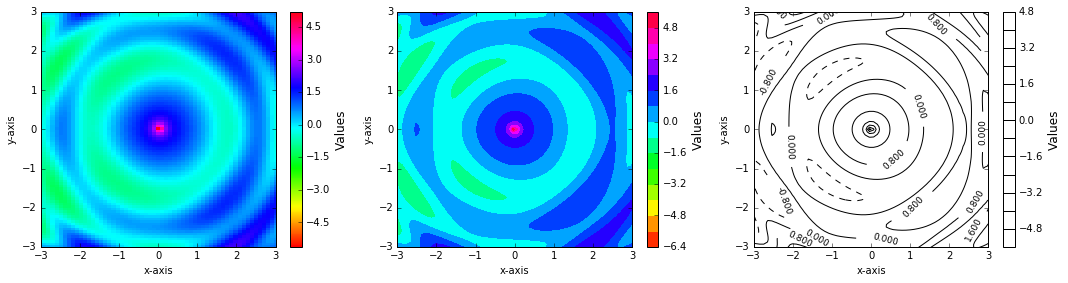

In [70]:
X, Y = np.meshgrid(np.linspace(-4.2, 6.2, 101), np.linspace(-3.2, 3.2, 101))
Z = np.cos(X**2+Y**2)*(X**2+Y**2)**-0.25 + 0.2*X*Y*np.sin(Y) \
   + 0.01*X*Y**4*np.sin(X) + 0.2*np.exp(-Y**2)
    
# plt.pcolor(X,Y,Z, cmap='hsv')# How to remove the white border?
# plt.ylim(-3,3)
# plt.xlim(-4,6)
# plt.show()
# plt.contourf(X,Y,Z, cmap='hsv') # Use a non-sequential color map
# plt.show()
# plt.contour(X,Y,Z, cmap='hsv')
# plt.show()

fig01 = plt.figure(figsize=(15,4)) # Get aspect ratio close to one while also using color bars
# If not using colorbars, can do figsize=(12,4) because 12/4 = 3 (three subplots)
ax = fig01.add_subplot(1,3,1)
bb = ax.pcolor(X,Y,Z, cmap='hsv')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_ylabel('y-axis')
ax.set_xlabel('x-axis')
cb1 = plt.colorbar(bb, ax=ax)
cb1.set_label('Values', fontsize=12)

ax2 = fig01.add_subplot(1,3,2)
aa = ax2.contourf(X,Y,Z,15, cmap='hsv')
ax2.set_ylabel('y-axis')
ax2.set_xlabel('x-axis')
ax2.set_xlim(-3,3)
ax2.set_ylim(-3,3)
cb2 = plt.colorbar(aa, ax=ax2)
cb2.set_label('Values', fontsize=12)

ax3 = fig01.add_subplot(1,3,3)
#plt.rcParams['contour.negative_linestyle'] = 'dashed' # If only black and white, negatives are dashed by default
CS = ax3.contour(X,Y,Z,15, colors='k')
ax3.clabel(CS, fontsize=9, inline=1)
ax3.set_xlim(-3,3)
ax3.set_ylim(-3,3)
cb3 = plt.colorbar(CS,ax=ax3)
cb3.set_label('Values', fontsize=12)
ax3.set_ylabel('y-axis')
ax3.set_xlabel('x-axis')

fig01.tight_layout()

### 3. Read 2D data and make scatter plot

Temperature and salinity are known to have an important relationship in oceanography. Investigate that relationship in the CTD data from one of the files stored in `data/MCH`. Read in the data and make the following plots as subplots in one figure:

1. plot temperature vs. salinity, using black dots to mark the data points.
1. plot temperature vs. salinity, and color the markers with the depth;
1. plot temperature vs. salinity, color the markers with the depth, and then size the markers with another property of your choice from the file.

Choose a colormap that is different from the default to use for the colors of your markers for the 2nd and 3rd plots.

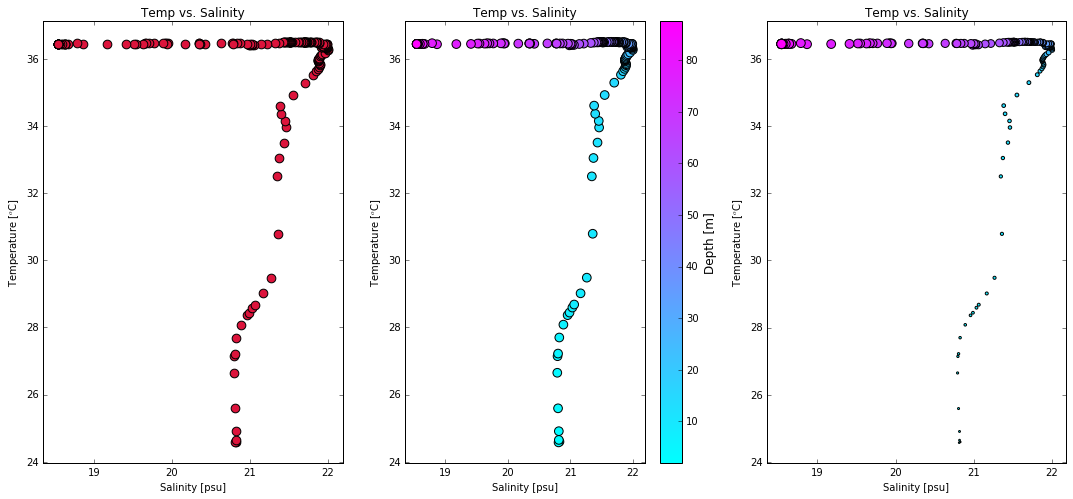

In [16]:
#plt.plot(x,y)
#plt.scatter(x,y,color='crimson',s=75,linewidths=1,edgecolor='black')
#plt.grid()
#plt.xlabel('Salinity [psu]')
#plt.ylabel('Temperature [°C]')
#plt.title('Temp vs. Salinity')

data02 = np.genfromtxt('MCH/m1017a.cnv2', skip_header=57)
temp = data02[:,2]
salinity = data02[:,5]
depth = data02[:,1]
perc_tran = data02[:,9]
x = temp
y = salinity
z = depth
t = perc_tran

fig02 = plt.figure(figsize=(15,7))  # figure size is given as a (width, height) tuple
ax = fig02.add_subplot(1,3,1)
ax.set_xlabel('Salinity [psu]')
ax.set_ylabel('Temperature [$^{o}$C]')
ax.set_title('Temp vs. Salinity')
ax.scatter(x,y,color='crimson',s=75,linewidths=1,edgecolor='black')
xticklocs = [18,19,20,21,22,23]
plt.xticks(xticklocs);
#ax.set_xlim(21,21.5)
ax.axis('tight')

ax2 = fig02.add_subplot(1,3,2)
ax2.set_xlabel('Salinity [psu]')
ax2.set_ylabel('Temperature [$^{o}$C]')
ax2.set_title('Temp vs. Salinity')
a = ax2.scatter(x,y,c=z,s=75,linewidths=1,edgecolor='black',cmap='cool')
cb = plt.colorbar(a, ax=ax2)
cb.set_label('Depth [m]', fontsize=12)
xticklocs = range(18,24,1) # Alternate way of specifying numbers represented by tick marks
plt.xticks(xticklocs);
#ax2.set_xlim(21,21.5)
#ax3 = ax2.twinx() # Making a depth axis to give some context of how temp changes, but no plotting depth data
#ax3.set_ylabel('Depth [m]')
#ax3.set_ylim(0,20)
#ax3.scatter(x,z)
ax2.axis('tight')

ax4 = fig02.add_subplot(1,3,3)
ax4.set_xlabel('Salinity [psu]')
ax4.set_ylabel('Temperature [$^{o}$C]')
ax4.set_title('Temp vs. Salinity')
ax4.scatter(x,y,c=z,s=z,linewidths=1,edgecolor='black',cmap='cool')
xticklocs = [18,19,20,21,22,23]
plt.xticks(xticklocs);
#ax4.set_xlim(21,21.5)
#ax5 = ax4.twinx() # Making a depth axis to give some context of how temp changes, but no plotting depth data
#ax5.set_ylabel('Depth [m]')
#ax5.set_ylim(0,20)
#ax3.scatter(x,z)
ax4.axis('tight')
# For sizing markers relative to another property, make sure the property has a large range (e.g., depth)
fig02.tight_layout()

### 4. Histogram

Make a 1D histogram of wind speed from the BURL1 NOAA weather station. Load the data like this:

    burl = np.genfromtxt('http://www.ndbc.noaa.gov/view_text_file.php?filename=burl1h2010.txt.gz&dir=data/historical/stdmet/')
    wind_speed = burl[:, 6]

*Bonus*: What kind of probability distribution does this look like? Plot your best guess on top of the histogram using a line.

In [85]:
def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if plt.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

formatter = FuncFormatter(to_percent)

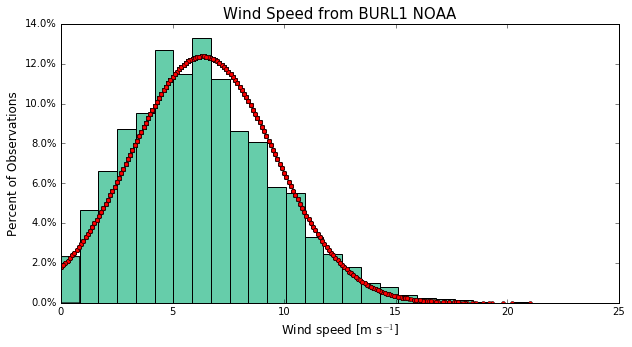

In [88]:
burl = np.genfromtxt('http://www.ndbc.noaa.gov/view_text_file.php?filename=burl1h2010.txt.gz&dir=data/historical/stdmet/')
wind_speed = burl[:, 6]

plt.figure(figsize=(10,5))
plt.hist(wind_speed, normed=True, bins=25, color='mediumaquamarine', lw=1, edgecolor='black')
# plt.ylabel()
plt.xlabel('Wind speed [m s$^{-1}$]',fontsize=12) # LaTeX syntax for meters per second
plt.ylabel('Percent of Observations',fontsize=12)
plt.title('Wind Speed from BURL1 NOAA',fontsize=15)
fit03 = stats.norm.pdf(wind_speed, np.mean(wind_speed), np.std(wind_speed))
plt.plot(wind_speed,fit03,'o', alpha=1, ms=4, color='red')
plt.gca().yaxis.set_major_formatter(formatter)

#### This is a right (positive) skewed distribution

### 5. (Grad) Fit and line and plot

Load in the Mauna Loa carbon dioxide dataset:

    mauna_loa_co2 = np.genfromtxt('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt')
    years = mauna_loa_co2[:, 0]
    months = mauna_loa_co2[:, 1]
    co2 = mauna_loa_co2[:, 4]


Fit a 1st (straight line), 2nd, and 5th order polynomial to the data. Use your polynomial fits to predict CO$_2$ in the year 2100. Which prediction do you think is most accurate?

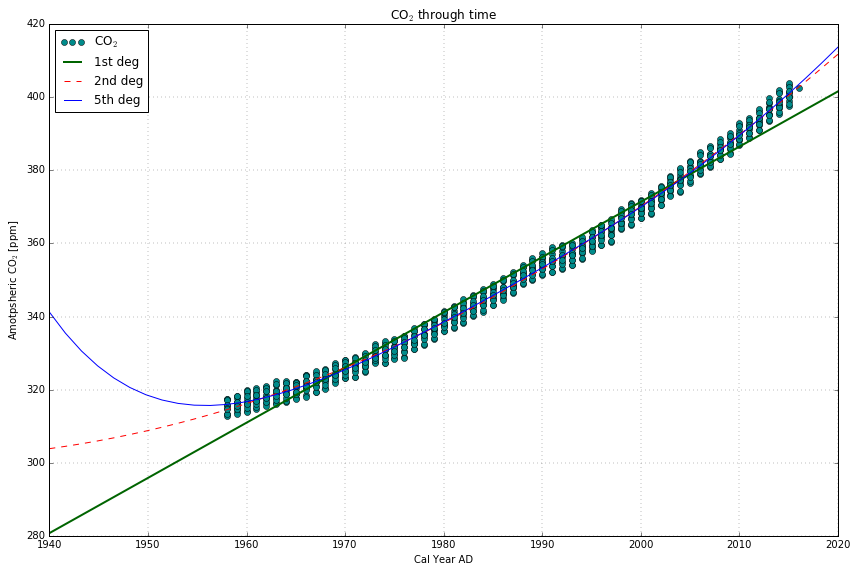

In [76]:
mauna_loa_co2 = np.genfromtxt('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt')
years = mauna_loa_co2[:, 0]
months = mauna_loa_co2[:, 1]
co2 = mauna_loa_co2[:, 4]

fig04 = plt.figure(figsize=(12,8)) 
ax = fig04.add_subplot(1,1,1)
ax.set_xlabel('Cal Year AD')
ax.set_ylabel('Amotpsheric CO$_{2}$ [ppm]')
ax.set_title('CO$_{2}$ through time')

#ax2 = fig.add_subplot(1,3,2)
#ax2.set_xlabel('Cal Year AD')
#ax2.set_ylabel('Amotpsheric CO$_{2}$ [ppm]')
#ax2.set_title('CO$_{2}$ through time')

#ax3 = fig.add_subplot(1,3,3)
#ax3.set_xlabel('Cal Year AD')
#ax3.set_ylabel('Amotpsheric CO$_{2}$ [ppm]')
#ax3.set_title('CO$_{2}$ through time')

# Polynomial line fitting
pf1 = np.polyfit(years, co2, 1) # 1st deg polynomial fit
u = np.linspace(1940,2020)
v = np.polyval(pf1,u)

pf2 = np.polyfit(years, co2, 2) # 2nd deg polynonial fit
q = np.polyval(pf2,u)

pf5 = np.polyfit(years, co2, 5) # 5th deg polynomial fit
r = np.polyval(pf5,u)

# Scatter plot with polynomial fit
ax.plot(years, co2, 'o',label='CO$_{2}$', markeredgecolor='black', alpha=1, color='darkcyan')
ax.plot(u,v,color='darkgreen', label='1st deg',lw=2)
ax.grid(lw=0.25)
ax.plot(u,q,'r--', label='2nd deg')
ax.grid(lw=0.25)
ax.plot(u,r,'b-', label='5th deg')
ax.grid(lw=0.25)
ax.legend(loc=0,numpoints=3)
# ax2.scatter(years, co2, s=1, c='green', alpha=1, edgecolor='black')
# ax2.plot(u,q,'r--')
# ax2.grid(lw=0.25)
# ax3.scatter(years, co2, s=0.5, c='green')
# ax3.plot(u,r,'r--')
# ax3.grid(lw=0.25)
fig04.tight_layout()

### 6. (Grad) Make a movie

Make a movie of annual mean surface air temperature predictions from the AR4 model. Data are found in `data/surface_temp_predictions.npz`. Load the data using

    lon, lat, mean_surf_temp = np.load('surface_temp_predictions.npz')['arr_0']

The `['arr_0']` is needed because of the way zipped `npz` files store data; see the docstring for `np.savez`. (The source for the data can be found [here](http://nomads.ncdc.noaa.gov/thredds/dodsC/gfdlcm2x/Stable2000/tas_A1.200101-210012.nc.html)).
Make sure your movie includes some representation of the earth (like coastlines), includes a colorbar, along with other appropriate labels.

The process will be to create a loop that creates a series of frames, labeled `frame_003.png`, for example. You will want to create a string for the filename using some code like this:

    frame_name = 'frame_%03d' % frame_number

Use [ffmpeg](https://www.ffmpeg.org) to stitch the frames together to create an H264 animation that can be played by quicktime. I use a command like this:

    $ ffmpeg -y -r 10 -i frames_%04d.png -c:v libx264 -pix_fmt yuv420p -crf 15 OUTFILE.mp4

where the options mean

    -y                  Overwrite old file
    
    -r 10               Play 10 frames per second
    
    -c:v libx264        Use the H264 library
    
    -crf 15             Use a compression factor of 15 (0=lossless, 51=poor.)
                        Quicktime cannot play lossless encoded movies. 15 appears to be reasonable.

    -pix_fmt yuv420p    Special command so that quicktime can play the movie.  Note, this requires
                        an even number of pixels.  If you don't have this, you can use convert to 
                        crop a pixel off edge of the image.

See [this page]https://trac.ffmpeg.org/wiki/x264EncodingGuide for more information.    

In [123]:
from mpl_toolkits.basemap import Basemap
lon, lat, mean_surf_temp = np.load('surface_temp_predictions.npz',encoding='latin1')['arr_0']

In [ ]:
from IPython.display import HTML

In [152]:
import netCDF4
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import pylab

data_url = 'soilw.mon.ltm.v2.nc'
tidx = -1 

m = Basemap(projection = 'lcc',
            llcrnrlon=-125,
            urcrnrlon=-10,
            llcrnrlat=0,
            urcrnrlat=60,
            lat_0=30,
            lon_0=-50,
            resolution='c')

nc = netCDF4.Dataset(data_url)

lon = nc.variables['lon'][:]
lat = nc.variables['lat'][:]
x, y = m(*np.meshgrid(lon, lat)) 

for n in range(0,12):
    soil = nc.variables['soilw'][n]

    fig=plt.figure(figsize=(20,10),dpi=100)
    ax=fig.add_subplot(111)

    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()

    m.drawmeridians(np.arange(-120,40,10),labels=[False, False, False, True])

    m.drawparallels(np.arange(0,70,10),labels=[True, False, False, False])

    plt.title('Monthly Average Soil Moisture_month %d' % (n+1),fontsize=28)

    pcm=ax.pcolormesh(x,y,soil,cmap=plt.cm.RdYlGn,vmin=0,vmax=740)

    cb=m.colorbar(pcm)

    cb.set_label('Soil FOO (mm)',fontsize=16)

    plt.savefig('soilmoisture_%06d.png' % n)

ImportError: No module named 'netCDF4'

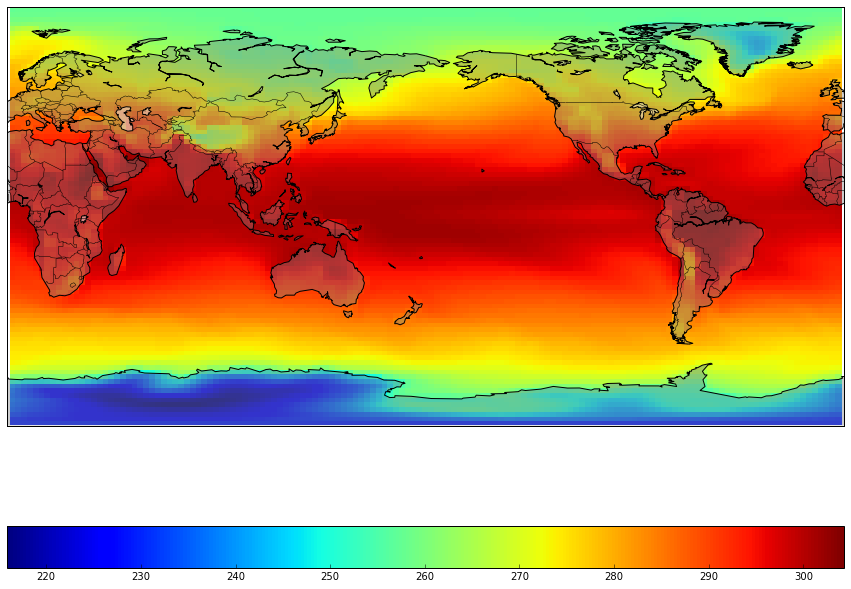

In [124]:
fig = plt.figure(figsize=(15, 12))


m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=0, urcrnrlon=360, resolution='c')
m.drawcoastlines(color='black', linewidth=1)
m.fillcontinents(color='grey', alpha=0.4)
m.drawcountries()

x, y = (np.meshgrid(lon, lat))

ba = plt.pcolormesh(x, y, mean_surf_temp[40], cmap='jet')
plt.colorbar(ba, orientation='horizontal')
#fig.savefig('test.png')